In [1]:
#importing necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
advertising = pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualizing the data`

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

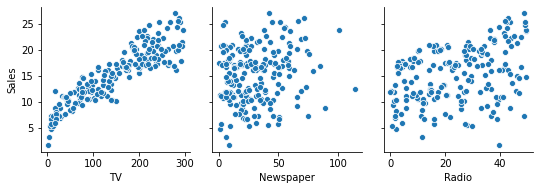

In [8]:
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

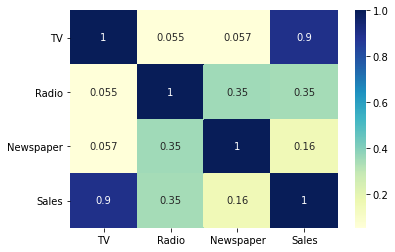

In [9]:
sns.heatmap(advertising.corr(),cmap='YlGnBu',annot=True)
plt.show()

### Performing Simple Linear Regression

In [10]:
X = advertising['TV']#independent variable
y= advertising['Sales']#dependent variable

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [12]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [13]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [14]:
# Building linear model using stats library
import statsmodels.api as sm

In [15]:
# add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [16]:
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [17]:
#fit the regression model using OLS-Ordinary Least Square
lr = sm.OLS(y_train,X_train_sm).fit()

In [18]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [19]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        10:06:17   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

- Interpretation:
    - Tv coefficient value is 0.05 it means if there is 1 unit increase in TV marketing budget then it will give 0.05 units of sales
    - Const (intercept) is 6.9, it means If there is no marketing budget on TV then the minimum sales you ll get is 6.9 crores/lakshs/millions units are up to your data

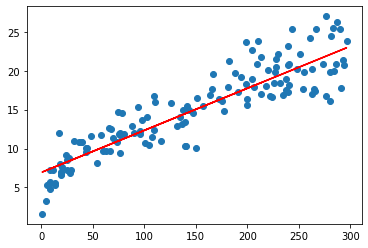

In [20]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.94+0.054*X_train,'r')
plt.show()

### Residual Analysis

In [21]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

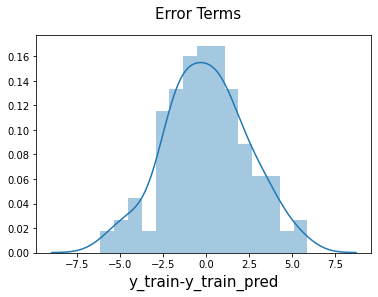

In [22]:
fig = plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

### Looking for the patterns in the residuals

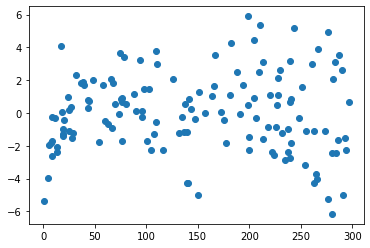

In [23]:
plt.scatter(X_train,res)
plt.show()

### Predictions on the test dataset

In [24]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [25]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966232

In [28]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.792103160124566

### Visualizing the fit on the test dataset

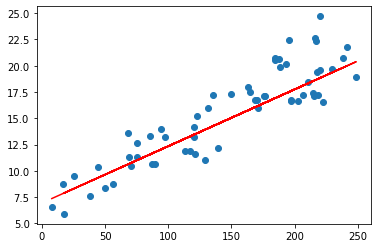

In [29]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.94+0.054*X_test,'r')
plt.show()

### Linear Regression using linear_model in sklearn

In [30]:
from sklearn.model_selection import train_test_split
X_train_lm,X_test_lm,y_train_lm,y_test_lm = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [31]:
X_train_lm.shape

(140,)

In [32]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [33]:
X_train_lm.shape

(140, 1)

In [34]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [35]:
print(lm.intercept_)

6.948683200001357


In [36]:
print(lm.coef_)

[0.05454575]


### Conceptual Questions

** Why it is called R-Square **

In [41]:
corrs = np.corrcoef(X_train,y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [43]:
corrs[0,1]**2

0.8157933136480386

- pearson correlation coefficient is denoted by 'r'  but when we do square of the correlation coefficient we are getting R2.

** What is the good RMSE value **

- There is not good RMSE, it totally depends on units of Y variables
- R2, Adj-R2 are the best to determine the model performance. compare to MAE,MSE we will be using RMSE

### Does Scaling has any impact on the model ?

- Min-Max Scaler
- Standard Scaler

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [39]:
X_train_scaled = X_train.values.reshape(-1,1)
y_train_scaled = y_train.values.reshape(-1,1)

In [40]:
X_train_scaled.shape

(140, 1)

In [41]:
X_train_scaled.mean()

147.71142857142857

In [42]:
X_train_scaled.std()

92.53392589108239

In [43]:
scaler = StandardScaler()
# We do fit_transform on Train dataset and only transform on test dataset
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [44]:
X_train_scaled.mean(),X_train_scaled.std()

(2.5376526277146434e-17, 0.9999999999999999)

In [45]:
X_test_scaled = X_test.values.reshape(-1,1)
y_test_scaled = y_test.values.reshape(-1,1)
X_test_scaled = scaler.transform(X_test_scaled)

In [46]:
# Original Test data 
X_test.mean(),X_test.std()

(145.48166666666665, 67.37906553041095)

In [47]:
#transformed test data
X_test_scaled.mean(),X_test_scaled.std()

(23.348480230951502, 11.956484518842634)

In [48]:
# Implementing regression on scaled dataset
X_train_scaled = sm.add_constant(X_train_scaled)
lr_scaled = sm.OLS(y_train_scaled,X_train_scaled).fit()

In [64]:
# Implementing regression on scaled dataset
X_train_scaled = sm.add_constant(X_train_scaled)
lr_scaled = sm.OLS(y_train_scaled,X_train_scaled).fit()

In [65]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        10:34:10   Log-Likelihood:                 131.74
No. Observations:                 140   AIC:                            -259.5
Df Residuals:                     138   BIC:                            -253.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.015     14.055      0.0

- Scaling doesn't affect the model predictions
- Scaling helps us for Faster convergence in gradient descent

** Home Work **
- Do predictions on test dataset using scaling data
- Implement MinMaxScaler also and do the predictions

In [67]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [68]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [69]:
from sklearn.metrics import mean_squared_error,r2_score

In [70]:
# RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

2.019296008966232

In [71]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.792103160124566

# MinMaxScaler

In [72]:
# import module
from sklearn.preprocessing import MinMaxScaler

In [73]:
# scale features
scaler = MinMaxScaler()
# We do fit_transform on Train dataset and only transform on test dataset
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [74]:
X_train_scaled.mean(),X_train_scaled.std()

(0.16572137140280535, 0.2959210105711338)

In [75]:
X_test_scaled = X_test.values.reshape(-1,1)
y_test_scaled = y_test.values.reshape(-1,1)
X_test_scaled = scaler.transform(X_test_scaled)

In [76]:
# Original Test data 
X_test.mean(),X_test.std()

(145.48166666666665, 67.37906553041095)

In [77]:
#transformed test data
X_test_scaled.mean(),X_test_scaled.std()

(145.48166666666668, 66.8152140650283)

In [78]:
# Implementing regression on scaled dataset
X_train_scaled = sm.add_constant(X_train_scaled)
lr_scaled = sm.OLS(y_train_scaled,X_train_scaled).fit()

In [79]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        10:38:48   Log-Likelihood:                 131.74
No. Observations:                 140   AIC:                            -259.5
Df Residuals:                     138   BIC:                            -253.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2121      0.015     14.055      0.0